# Capstone Project - The Battle of Neighborhoods

**Applied Data Science Capstone by IBM , on Coursera (Last course to get the Data Science Professional Certificate)**

# Table of Contents

1. <a href='#Introduction: Business Problem'>Introduction: Business Problem</a>
2. <a href='#Data'>Data</a>
3. <a href='#Methodology'>Methodology</a>
4. <a href='Results'>Results</a>
5. <a href='#Discussion'>Discussion</a>
6. <a href='#Conclusion'>Conclusion</a>

<a id='Introduction: Business Problem'></a>
## Introduction: Business Problem 


**Aurora Coffee Shop** is a Chinese company that was founded in the city of Shanghai in 1992, its particular way of preparing coffee and its own recipes make it unique worldwide. Due to the economic growth it has had in recent times, its shareholders decided to open new shops outside of China.

They consider that the United States (New York City) is a market in which they can succeed.

After several meetings, they have decided to focus their attention on **Brooklyn** since this borough is known for its cultural, social, and ethnic diversity, an independent art scene, distinct neighborhoods, and a distinctive architectural heritage. Another influencing factor is that since 2010, Brooklyn has evolved into a thriving hub of entrepreneurship and high technology startup firms, and of postmodern art and design.

As part of the company's **Data Science team**, I was tasked with recommending the two best areas for setting up their 2 new shops:

1. In the area where the 1st or 2nd most common venue is Coffee Shops
2. In another area where the data science team deems appropriate (borough analysis's results)


<a id='Data'></a>
## Data


Based on definition of our problem, following are the factors addressed:

- Number of existing Coffee Shops in Brooklyn
- Most interested venues

Following data sources will be needed to extract/generate the required information:

- NYC json file (https://cocl.us/new_york_dataset) containing features, names, coordinates, neighborhoods, boroughs and geometric properties of      those boroughs within NYC
- Forsquare API to get the most common venues of each neihborhoods in Brooklyn



<a id='Methodology'></a>
## Methodology

#### 1- Downloading all the dependencies 

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
!conda install -c conda-forge geocoder --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib as mpl
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

!pip install lxml

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


#### 2- A) Downloading and Exploring Dataset

In [2]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [3]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [4]:
#All the relevant data is in the *features* key, which is basically a list of the neighborhoods. So, let's define a new variable that includes this data
neighborhoods_data = newyork_data['features']

In [5]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

#### 2- B) Tranforming the data into a pandas dataframe

In [6]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [7]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [8]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [9]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [10]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


#### 3- A) Using geopy library to get the latitude and longitude values of New York City

The geographical coordinates for NYC boroughs and neighborhoods is extracted from the NYC json file. 

We must do this step before the generation of a folium map.

The folium library allows for simple implementation of data visualisation via folium map.

In [11]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


#### 3- B) Creating a map of New York with neighborhoods superimposed on top

In [12]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

#### 3- C) The Data Science team wants to segment and cluster only the neighborhoods in Brooklyn.We are going to slice the original dataframe and create a new dataframe of the Brooklyn data.

In [13]:
brooklyn_data = neighborhoods[neighborhoods['Borough'] == 'Brooklyn'].reset_index(drop=True)
brooklyn_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Brooklyn,Bay Ridge,40.625801,-74.030621
1,Brooklyn,Bensonhurst,40.611009,-73.995180
2,Brooklyn,Sunset Park,40.645103,-74.010316
3,Brooklyn,Greenpoint,40.730201,-73.954241
4,Brooklyn,Gravesend,40.595260,-73.973471


In [14]:
print('Brooklyn has {} neighborhoods.'.format(
        brooklyn_data.shape[0]
    )
)

Brooklyn has 70 neighborhoods.


In [15]:
address = 'Brooklyn, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Brooklyn are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Brooklyn are 40.6501038, -73.9495823.


#### 3- D) Creating a map of Brooklyn with neighborhoods superimposed on top

In [16]:
# create map of Manhattan using latitude and longitude values
map_brooklyn = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(brooklyn_data['Latitude'], brooklyn_data['Longitude'], brooklyn_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_brooklyn)  
    
map_brooklyn

#### 4- Foursquare API

Foursquare is a technology company that built a massive dataset of a accurate location data.

Foursquare powers location data for Apple maps, Uber, Snapchat and many others.

Their API and location data are currently being used by over 100.000 developers.

URL: [Foursquare ](https://www.foursquare.com)

#### A) Lets Define Foursquare Credentials and Version

In [17]:
# The code was removed by Watson Studio for sharing.

Your credentails:
CLIENT_ID: 5ONNOH00XEKIUJRCLAC2WS0TJVTLTOQE40CB4DSGHCO0CYSE
CLIENT_SECRET:RSYFZTHNELPAMIDLZH33DXBRXLTOE3LCLXV2M0LHY0HFXJ5O


#### 4- B) Exploring Neighborhoods in Brooklyn

In [18]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [19]:
brooklyn_venues = getNearbyVenues(names=brooklyn_data['Neighborhood'],
                                   latitudes=brooklyn_data['Latitude'],
                                   longitudes=brooklyn_data['Longitude']
                                  )


Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker Heights
Gerritsen Beach
Marine Park
Clinton Hill
Sea Gate
Downtown
Boerum Hill
Prospect Lefferts Gardens
Ocean Hill
City Line
Bergen Beach
Midwood
Prospect Park South
Georgetown
East Williamsburg
North Side
South Side
Ocean Parkway
Fort Hamilton
Ditmas Park
Wingate
Rugby
Remsen Village
New Lots
Paerdegat Basin
Mill Basin
Fulton Ferry
Vinegar Hill
Weeksville
Broadway Junction
Dumbo
Homecrest
Highland Park
Madison
Erasmus


In [20]:
print(brooklyn_venues.shape)
brooklyn_venues.head()

(2816, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bay Ridge,40.625801,-74.030621,Pilo Arts Day Spa and Salon,40.624748,-74.030591,Spa
1,Bay Ridge,40.625801,-74.030621,Bagel Boy,40.627896,-74.029335,Bagel Shop
2,Bay Ridge,40.625801,-74.030621,Cocoa Grinder,40.623967,-74.030863,Juice Bar
3,Bay Ridge,40.625801,-74.030621,Pegasus Cafe,40.623168,-74.031186,Breakfast Spot
4,Bay Ridge,40.625801,-74.030621,Ho' Brah Taco Joint,40.622960,-74.031371,Taco Place


#### 4- C) Venues per each neighborhood

In [21]:
brooklyn_grouped= brooklyn_venues.groupby('Neighborhood').count()

In [22]:
brooklyn_grouped

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bath Beach,45,45,45,45,45,45
Bay Ridge,87,87,87,87,87,87
Bedford Stuyvesant,26,26,26,26,26,26
Bensonhurst,34,34,34,34,34,34
Bergen Beach,6,6,6,6,6,6
Boerum Hill,90,90,90,90,90,90
Borough Park,25,25,25,25,25,25
Brighton Beach,44,44,44,44,44,44
Broadway Junction,15,15,15,15,15,15


#### 4- D) How many unique categories can be curated from all the returned venues

In [23]:
print('There are {} uniques categories.'.format(len(brooklyn_venues['Venue Category'].unique())))

There are 286 uniques categories.


In [24]:
brooklyn_grouped.drop(columns =['Neighborhood Latitude', 'Neighborhood Longitude','Venue Latitude', 'Venue Longitude', 'Venue Category'],inplace=True)

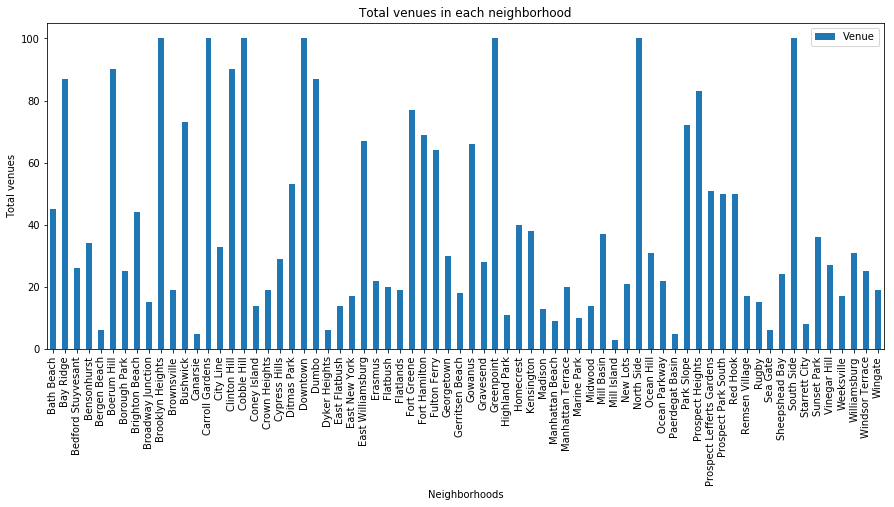

In [25]:
brooklyn_grouped.plot(kind='bar', figsize=(15, 6))

plt.xlabel('Neighborhoods') # add to x-label to the plot
plt.ylabel('Total venues') # add y-label to the plot
plt.title('Total venues in each neighborhood') # add title to the plot

plt.show()

#### 5- A) Analyzing Each Neighborhood

k-means clustering algorithm only functions with numerical values:

The venue categories are not numerical values.This implies that venue categories need to be converted into numerical values.

Machine Learning applied :One-Hot Encoding, that quantifies categorical data. 



In [26]:
# one hot encoding
brooklyn_onehot = pd.get_dummies(brooklyn_venues[['Venue Category']], prefix="", prefix_sep="")


brooklyn_onehot['Neighborhood'] = brooklyn_venues ['Neighborhood'] 


fixed_columns = [brooklyn_onehot.columns[-1]] + list(brooklyn_onehot.columns[:-1])
brooklyn_onehot = brooklyn_onehot[fixed_columns]


brooklyn_onehot.head()

,Yoga Studio,Accessories Store,Adult Boutique,African Restaurant,Airport Terminal,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cha Chaan Teng,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Herbs & Spices Store,History Museum,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Non-Profit,Noodle House,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoors & Recreation,Pakistani Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Pie Shop,Piercing Parlor,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Print Shop,Pub,Racetrack,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Rock Club,Roller Rink,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tibetan Restaurant,Tiki Bar,Toy / Game Store,Trail,Turkish Restaurant,Used Bookstore,Vape Store,Varenyky restaurant,Veg

In [27]:
brooklyn_onehot.shape

(2816, 286)

In [28]:
brooklyn_grouped = brooklyn_onehot.groupby('Neighborhood').mean().reset_index()
brooklyn_grouped

,Neighborhood,Yoga Studio,Accessories Store,Adult Boutique,African Restaurant,Airport Terminal,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cha Chaan Teng,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Herbs & Spices Store,History Museum,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Non-Profit,Noodle House,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoors & Recreation,Pakistani Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Pie Shop,Piercing Parlor,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Print Shop,Pub,Racetrack,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Rock Club,Roller Rink,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tibetan Restaurant,Tiki Bar,Toy / Game Store,Trail,Turkish Restaurant,Used Bookstore,Vape Store,Varenyky restaurant,Veg

In [29]:
brooklyn_grouped.shape

(70, 286)

#### 5- B) Printing each neighborhood along with the top 5 most common venues

The output is a dataframe containing neighborhoods and their corresponding degrees of most common venues.

In [30]:
num_top_venues = 5

for hood in brooklyn_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = brooklyn_grouped[brooklyn_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bath Beach----
                  venue  freq
0              Pharmacy  0.07
1       Bubble Tea Shop  0.04
2            Donut Shop  0.04
3    Chinese Restaurant  0.04
4  Fast Food Restaurant  0.04


----Bay Ridge----
                 venue  freq
0   Italian Restaurant  0.09
1                  Spa  0.07
2          Pizza Place  0.05
3  American Restaurant  0.03
4                  Bar  0.03


----Bedford Stuyvesant----
         venue  freq
0  Coffee Shop  0.08
1  Pizza Place  0.08
2         Café  0.08
3          Bar  0.08
4         Park  0.04


----Bensonhurst----
                venue  freq
0  Chinese Restaurant  0.12
1         Pizza Place  0.09
2        Dessert Shop  0.06
3          Donut Shop  0.06
4    Sushi Restaurant  0.06


----Bergen Beach----
                venue  freq
0     Harbor / Marina  0.33
1      Baseball Field  0.17
2          Playground  0.17
3          Donut Shop  0.17
4  Athletics & Sports  0.17


----Boerum Hill----
                    venue  freq
0             Cof

#### 5- C) Putting that into a pandas dataframe (function to sort the venues in descending order)

In [31]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#### 5- D) Top 10 venues for each neighborhood

In [32]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = brooklyn_grouped['Neighborhood']

for ind in np.arange(brooklyn_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(brooklyn_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bath Beach,Pharmacy,Kids Store,Donut Shop,Bubble Tea Shop,Chinese Restaurant,Italian Restaurant,Sushi Restaurant,Fast Food Restaurant,Pizza Place,Mobile Phone Shop
1,Bay Ridge,Italian Restaurant,Spa,Pizza Place,Greek Restaurant,American Restaurant,Bar,Gym / Fitness Center,Mexican Restaurant,Seafood Restaurant,Sandwich Place
2,Bedford Stuyvesant,Café,Pizza Place,Bar,Coffee Shop,Deli / Bodega,Thrift / Vintage Store,Bus Station,Sandwich Place,Boutique,Fried Chicken Joint
3,Bensonhurst,Chinese Restaurant,Pizza Place,Dessert Shop,Donut Shop,Ice Cream Shop,Sushi Restaurant,Cosmetics Shop,Coffee Shop,Noodle House,Pharmacy
4,Bergen Beach,Harbor / Marina,Donut Shop,Playground,Athletics & Sports,Baseball Field,Women's Store,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant
5,Boerum Hill,Dance Studio,Coffee Shop,Furniture / Home Store,French Restaurant,Sandwich Place,Spa,Bar,Yoga Studio,Gym / Fitness Center,Deli / Bodega
6,Borough Park,Bank,Pizza Place,Deli / Bodega,Pharmacy,Toy / Game Store,Coffee Shop,Restaurant,Chinese Restaurant,Fast Food Restaurant,Café
7,Brighton Beach,Eastern European Restaurant,Restaurant,Russian Restaurant,Beach,Fast Food Restaurant,Sushi Restaurant,Bank,Mobile Phone Shop,Gourmet Shop,Mediterranean Restaurant
8,Broadway Junction,Donut Shop,Diner,Supermarket,Bus Station,Sandwich Place,Gas Station,Seafood Restaurant,Bus Stop,Caribbean Restaurant,Fried Chicken Joint
9,Brooklyn Heights,Yoga Studio,Park,Cosmetics Shop,Deli / Bodega,Pizza Place,Bakery,Italian Restaurant,Gym,Gym / Fitness Center,Plaza


#### 6- A) Clustering Neighborhoods ( 5 clusters)

**K-means-Clustering**:

Introduction to Clustering (Customer Segmentation):It is the practice of partitioning a customer base into groups of individuals that have similar characteristics.It can grouo data only unsupervised, based on the similarity of customers to each other.

**What is a cluster?**

A group of objects that are similar to other objects in the cluster and dissimilar to data points in other clusters.

**Introduction to K- means:**

It is a type of partitioning clustering . It divides the data into non-overlapping subsets (clusters) without any cluster-internal structure.

In [33]:
# set number of clusters
kclusters = 5

brooklyn_grouped_clustering = brooklyn_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(brooklyn_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

#### 6- B) Creating a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood

In [34]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

brooklyn_merged = brooklyn_data

# merge brooklyn_grouped with brooklyn_data to add latitude/longitude for each neighborhood
brooklyn_merged = brooklyn_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

brooklyn_merged # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Brooklyn,Bay Ridge,40.625801,-74.030621,2,Italian Restaurant,Spa,Pizza Place,Greek Restaurant,American Restaurant,Bar,Gym / Fitness Center,Mexican Restaurant,Seafood Restaurant,Sandwich Place
1,Brooklyn,Bensonhurst,40.611009,-73.995180,2,Chinese Restaurant,Pizza Place,Dessert Shop,Donut Shop,Ice Cream Shop,Sushi Restaurant,Cosmetics Shop,Coffee Shop,Noodle House,Pharmacy
2,Brooklyn,Sunset Park,40.645103,-74.010316,2,Mexican Restaurant,Latin American Restaurant,Bank,Bakery,Pizza Place,Mobile Phone Shop,Deli / Bodega,Gym,Pharmacy,Donut Shop
3,Brooklyn,Greenpoint,40.730201,-73.954241,2,Bar,Coffee Shop,Cocktail Bar,Pizza Place,Yoga Studio,French Restaurant,Café,Boutique,Mexican Restaurant,Record Shop
4,Brooklyn,Gravesend,40.595260,-73.973471,0,Pizza Place,Italian Restaurant,Bakery,Bus Station,Lounge,Gym,Pharmacy,Donut Shop,Chinese Restaurant,Fish Market
5,Brooklyn,Brighton Beach,40.576825,-73.965094,2,Eastern European Restaurant,Restaurant,Russian Restaurant,Beach,Fast Food Restaurant,Sushi Restaurant,Bank,Mobile Phone Shop,Gourmet Shop,Mediterranean Restaurant
6,Brooklyn,Sheepshead Bay,40.586890,-73.943186,2,Dessert Shop,Turkish Restaurant,Sandwich Place,Department Store,Russian Restaurant,Restaurant,Creperie,Pizza Place,Yoga Studio,Buffet
7,Brooklyn,Manhattan Terrace,40.614433,-73.957438,2,Pizza Place,Donut Shop,Convenience Store,Jazz Club,Grocery Store,Coffee Shop,Steakhouse,Gourmet Shop,Electronics Store,Japanese Restaurant
8,Brooklyn,Flatbush,40.636326,-73.958401,2,Mexican Restaurant,Coffee Shop,Caribbean Restaurant,Bagel Shop,Plaza,Pharmacy,Diner,Donut Shop,Chinese Restaurant,Sandwich Place
9,Brooklyn,Crown Heights,40.670829,-73.943291,2,Pizza Place,Museum,Bagel Shop,Café,Burger Joint,Candy Store,Bakery,Liquor Store,Supermarket,Coffee Shop


#### 6- C) Visualizing the clusters  

In [35]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(brooklyn_merged['Latitude'], brooklyn_merged['Longitude'], brooklyn_merged['Neighborhood'], brooklyn_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### 7- Examining  Clusters

#### Cluster 1

In [36]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 0, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Gravesend,Pizza Place,Italian Restaurant,Bakery,Bus Station,Lounge,Gym,Pharmacy,Donut Shop,Chinese Restaurant,Fish Market
39,Sea Gate,Bus Station,Home Service,Beach,Business Service,Optical Shop,Spa,Flea Market,Fish Market,Fish & Chips Shop,Flower Shop
46,Midwood,Pizza Place,Deli / Bodega,Video Game Store,Burger Joint,Candy Store,Bakery,Convenience Store,Italian Restaurant,Bank,Pharmacy
68,Madison,Deli / Bodega,Bagel Shop,Pilates Studio,Italian Restaurant,Pizza Place,Bus Station,Candy Store,Restaurant,Spa,Construction & Landscaping


#### Cluster 2

In [37]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 1, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
28,Canarsie,Gym,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Grocery Store,Flea Market,Fish Market,Fish & Chips Shop,Filipino Restaurant,Field
59,Paerdegat Basin,Gym,Chinese Restaurant,Moving Target,Food,Asian Restaurant,Field,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant


#### Cluster 3

In [38]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 2, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bay Ridge,Italian Restaurant,Spa,Pizza Place,Greek Restaurant,American Restaurant,Bar,Gym / Fitness Center,Mexican Restaurant,Seafood Restaurant,Sandwich Place
1,Bensonhurst,Chinese Restaurant,Pizza Place,Dessert Shop,Donut Shop,Ice Cream Shop,Sushi Restaurant,Cosmetics Shop,Coffee Shop,Noodle House,Pharmacy
2,Sunset Park,Mexican Restaurant,Latin American Restaurant,Bank,Bakery,Pizza Place,Mobile Phone Shop,Deli / Bodega,Gym,Pharmacy,Donut Shop
3,Greenpoint,Bar,Coffee Shop,Cocktail Bar,Pizza Place,Yoga Studio,French Restaurant,Café,Boutique,Mexican Restaurant,Record Shop
5,Brighton Beach,Eastern European Restaurant,Restaurant,Russian Restaurant,Beach,Fast Food Restaurant,Sushi Restaurant,Bank,Mobile Phone Shop,Gourmet Shop,Mediterranean Restaurant
6,Sheepshead Bay,Dessert Shop,Turkish Restaurant,Sandwich Place,Department Store,Russian Restaurant,Restaurant,Creperie,Pizza Place,Yoga Studio,Buffet
7,Manhattan Terrace,Pizza Place,Donut Shop,Convenience Store,Jazz Club,Grocery Store,Coffee Shop,Steakhouse,Gourmet Shop,Electronics Store,Japanese Restaurant
8,Flatbush,Mexican Restaurant,Coffee Shop,Caribbean Restaurant,Bagel Shop,Plaza,Pharmacy,Diner,Donut Shop,Chinese Restaurant,Sandwich Place
9,Crown Heights,Pizza Place,Museum,Bagel Shop,Café,Burger Joint,Candy Store,Bakery,Liquor Store,Supermarket,Coffee Shop
10,East Flatbush,Food & Drink Shop,Hardware Store,Caribbean Restaurant,Food,Bakery,Chinese Restaurant,Fast Food Restaurant,Supermarket,Moving Target,Park


#### Cluster 4

In [39]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 3, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
30,Mill Island,Pool,Lake,Food,Field,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant


#### Cluster 5

In [40]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 4, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
27,Starrett City,Pizza Place,American Restaurant,Bus Stop,Donut Shop,Supermarket,Pharmacy,Shopping Mall,Caribbean Restaurant,Fish Market,Fish & Chips Shop
29,Flatlands,Pharmacy,Caribbean Restaurant,Fried Chicken Joint,Fast Food Restaurant,Nightclub,Bar,Electronics Store,Lounge,Paper / Office Supplies Store,Park
32,Coney Island,Caribbean Restaurant,Baseball Stadium,Gourmet Shop,Athletics & Sports,Brewery,Food Court,Skating Rink,Pharmacy,Monument / Landmark,Theme Park Ride / Attraction
47,Prospect Park South,Caribbean Restaurant,Pharmacy,Grocery Store,Fast Food Restaurant,Mobile Phone Shop,Pizza Place,Latin American Restaurant,Kids Store,Donut Shop,Fried Chicken Joint
56,Rugby,Caribbean Restaurant,Bank,Supermarket,Fried Chicken Joint,Mobile Phone Shop,Seafood Restaurant,Chinese Restaurant,Fast Food Restaurant,Coffee Shop,Sandwich Place
57,Remsen Village,Caribbean Restaurant,Fast Food Restaurant,Donut Shop,Fish Market,Fried Chicken Joint,Supermarket,Café,Sandwich Place,Salad Place,Gym
69,Erasmus,Caribbean Restaurant,Yoga Studio,Grocery Store,Playground,Pharmacy,Convenience Store,Donut Shop,School,Music Venue,Mobile Phone Shop


<a id='Results'></a>
## Results

After analyzing the dataset using different functions and techniques, some important data could be discovered in order to make the final decision about the two places to set up the new shops.

NCY is divided into 5 borough: Manhattan, Bronxs, Queens, Staten Island and Brooklyn and 306 neihborhoods.

Brooklyn has 70 neighborhoods.

After analyzing Venues per each neighborhood, it turns out that there are 287 unique categories.

We believed it was very important to know what the neighborhoods with more venues were and the result was the following: Brooklyn Heights, Caroll Gardens, Cobble Hill, Downtown, Greenpoint, North Side and South Side.

Printing each neighborhood along with the top 5 most common venues: We focused our attention on neighborhoods that have coffee shops or similar points of interest as well as attractions where people are attracted to drink coffee (Take Away).

Taking into account the Top 10 venues for each neighborhood we decided to apply clustering (5 clusters) where we could clearly see that cluster 3 is where the largest number of neighborhoods are centred in which the 1st or 2nd coomon venue is a Coffee Shop or similar. For this reason, from there, we began to decide which of these neihgbourhoods would be the elect.

The decision will be made by combining the information obtained.

<a id='Discussion'></a>
## Discussion

Analyzing Cluster number 3 and since the shareholders of the company want to set up one of their new stores in a central location (surrounded by many competitors) we consider that **DUMBO** is a good option:

    ----Dumbo---- 

    venue  freq
            
0            Park  0.06 (people tend to drink coffee take away or after walking around the park prefer to spend time on a coffee shop)

1     Coffee Shop  0.06

2  Scenic Lookout  0.05 (Visitors from all over the world prefer this location while they are taking a stroll around Brooklyn)

3       Bookstore  0.05 

4            Café  0.05



Visualizing the map of Brooklyn with clusters superimposed on top, we can see that DUMBO is very close to the two main bridges that connect the Borough with Manhattan (Brooklyn Bridge and Manhattan Bridge) so it is a key point for the entire borough.

We consider important that Dumbo is not among the neighborhoods with more venues since people usually prefer to avoid areas where a lot of shops and stores in the same place. For this same reason we believe it is necessary that the second place respect that principle.

**PARK SLOPE** is the neighborhood that recommends the data science team to set up the company's second shop.

First of all, the most important factor is that it is located in the same area as Prospect Park, a place visited by tourists throughout the year. At the same time we saw that it is very full of restaurants and that people tend to go to eat in those places, so a coffee after lunch is an excellent option for the customers. Also it could be seen that the third common venue is a Coffee Shop (Culture of coffee in the area).

    ----Park Slope----
 
    venue  freq
                 
0  American Restaurant  0.06

1         Burger Joint  0.06

2          Coffee Shop  0.06

3          Pizza Place  0.04

4   Italian Restaurant  0.04

The Data Science team considers these two neighborhoods as the best to set up the first two coffees in the US, but it strongly recommends that after a trial period an analysis of the borough Manhattan begins to be aimed at the labour market in the area.

It is key for the success of this venture to design the shops differently since the target audience is completely different from that of Asia, so we already contacted the marketing and commercial department to analyze this point and start working on the topic.


<a id='Conclusion'></a>
## Conclusion

The goal of this project was to determine the two best places to set up the two new shops in the US, specifically in Brooklyn.
After analyzing the information received by applying the work methodology, the decision was made to choose two neighborhoods taking into account different factors detailed above.

As a member of the Data Science team, I considered necessary to gather more information from the two neighborhoods selected, so we had a meeting with members of human resources and the department of institutional relations and the result was as follows:

**DUMBO** (Down Under the Manhattan Bridge Overpass)  is the neighborhood in northwest Brooklyn with the best views of Manhattan. Home to Jane’s Carousel and Brooklyn Bridge Park as well as classic cobblestone streets, and right near historic and undiscovered Vinegar Hill, DUMBO is a classic destination that is also home to many celebrities in the Clocktower apartment building.
DUMBO is home to many wonderful restaurants, such as the original Grimaldi’s pizzeria. One Girl Cookies is a must-visit down by the water before you go for a stroll through the park and catch breathtaking views of Manhattan. In the summer, movies are shown along the waterfront. 
Nearby neighborhoods: Brooklyn Heights, Cobble Hill, Downtown Brooklyn


**Park Slope** is located on the hill leading up to Prospect Park, the largest park in Brooklyn. (Prospect Park was created by Frederick Olmsted and Calvert Vaux, who also created Central Park in Manhattan)
Park Slope has been listed as one of the most desirable neighborhoods to live in because of its quiet streets, good restaurants, good schools, and proximity to the Brooklyn Museum, Botanical Gardens, Prospect Park, access to public transit, and more.
Park Slope is known for its historic brownstones and flickering gas-powered lamps in front of them, and the tree-lined streets offer available free parking, and young families and professionals wander the thin historic sidewalks. 

The Data Science team of a company always has to work together with all the departments of the organization having to handle variables from different areas that is sometimes better managed by another department.
 